Accuracy for k=9: 93.33%
Confusion Matrix:
[[ 9  0  2]
 [ 0 11  0]
 [ 0  0  8]]


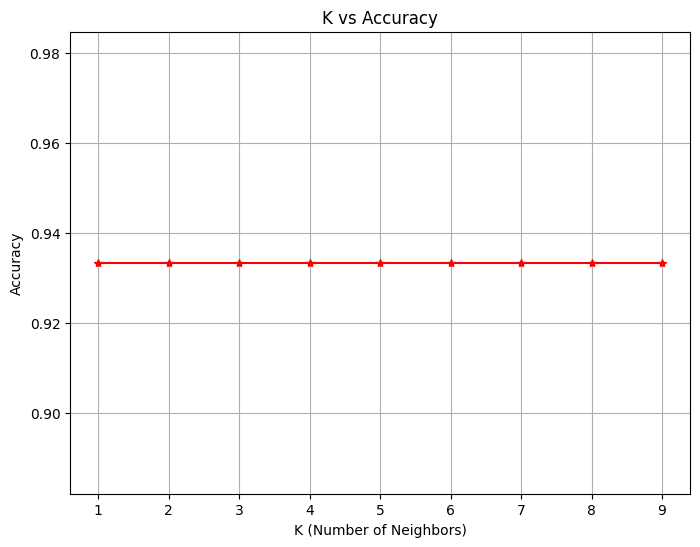

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

def load_flower_data(filepath):
    data_list = []
    with open(filepath, 'r') as file:
        next(file)
        for line in file:
            if line.strip():
                row_elements = line.strip().split(',')
                feature_values = [float(val) for val in row_elements[1:-1]]
                class_label = row_elements[-1]
                data_list.append(feature_values + [class_label])
    return data_list

def calc_euclidean_dist(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predictor(training_set, single_test_sample, neighbors):
    all_distances = []

    for item in training_set:
        distance = calc_euclidean_dist(np.array(item[:-1]), np.array(single_test_sample[:-1]))
        all_distances.append((distance, item[-1]))

    all_distances.sort(key=lambda x: x[0])
    nearest_neighbors = all_distances[:neighbors]

    neighbor_classes = [neighbor[1] for neighbor in nearest_neighbors]
    common_class = Counter(neighbor_classes).most_common(1)[0][0]

    return common_class

def split_train_test(data_records, test_ratio=0.2):
    random.shuffle(data_records)
    index_split = int(len(data_records) * (1 - test_ratio))
    return data_records[:index_split], data_records[index_split:]

def calc_accuracy(actual_labels, predicted_labels):
    correct_predictions = np.sum(np.array(actual_labels) == np.array(predicted_labels))
    return correct_predictions / len(actual_labels)

def gen_confusion_matrix(actual_labels, predicted_labels, all_labels):
    conf_matrix = np.zeros((len(all_labels), len(all_labels)), dtype=int)
    label_map = {label: i for i, label in enumerate(all_labels)}
    for true_lbl, pred_lbl in zip(actual_labels, predicted_labels):
        conf_matrix[label_map[true_lbl]][label_map[pred_lbl]] += 1
    return conf_matrix

def evaluate_knn(data_records, k_list, test_split=0.2):
    train_set, test_set = split_train_test(data_records, test_split)
    x_test_set = [record[:-1] for record in test_set]
    y_test_set = [record[-1] for record in test_set]

    accuracy_results = []
    for k in k_list:
        y_predicted = []
        for test_sample in test_set:
            pred_label = knn_predictor(train_set, test_sample, k)
            y_predicted.append(pred_label)

        accuracy_result = calc_accuracy(y_test_set, y_predicted)
        accuracy_results.append(accuracy_result)

        if k == max(k_list):
            print(f"Accuracy for k={k}: {accuracy_result * 100:.2f}%")
            print("Confusion Matrix:")
            print(gen_confusion_matrix(y_test_set, y_predicted, list(set(y_test_set))))

    return accuracy_results

def plot_accuracy_vs_k(k_list, accuracy_results):
    plt.figure(figsize=(8, 6))
    plt.plot(k_list, accuracy_results, marker='*', linestyle='-', color='red')
    plt.title('K vs Accuracy')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

flower_data = load_flower_data('iris.csv')
neighbor_counts = list(range(1, 10))
accuracy_results = evaluate_knn(flower_data, neighbor_counts)
plot_accuracy_vs_k(neighbor_counts, accuracy_results)
